Comparative Performance Study of Clustering Algorithms on Heart Disease Dataset

This assignment evaluates the performance of various clustering algorithms applied to the Heart Disease dataset from the UCI Machine Learning Repository.

We will apply K-Means, Hierarchical Clustering, and Mean Shift Clustering, using preprocessing methods like normalization and PCA (Principal Component Analysis) to enhance performance. The effectiveness of each method will be assessed using Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Index. The goal is to identify the best clustering approach for this dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,MeanShift
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score


In [2]:
from google.colab import files
uploaded=files.upload()  #uploaded synthetic_heart_disease_data.csv dataset here

Saving synthetic_heart_disease_data.csv to synthetic_heart_disease_data.csv


In [3]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

data = pd.read_csv('synthetic_heart_disease_data.csv', names=column_names)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,67,1,3,112,578,1,1,146,0,1.7877567092517028,2,2,3,1
2,57,1,0,183,442,1,0,79,0,3.141613656090067,2,4,6,0
3,43,1,2,160,429,0,2,98,0,4.1858512289607805,2,0,1,1
4,71,0,1,112,272,1,0,198,0,4.778830654043263,0,0,2,0


In [6]:
data.replace('NaN', np.nan,inplace=True)

# Convered columns to numeric:
data=data.apply(pd.to_numeric,errors='ignore')

# Filled missing values in numeric columns only:
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

<ipython-input-6-2a63e0e814f0>:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data=data.apply(pd.to_numeric,errors='ignore')


In [7]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("After one-hot encoding:")
print(data_encoded.info())
print("Columns in the DataFrame after encoding:", data_encoded.columns.tolist())
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for column in numeric_columns:
    data_encoded[column] = pd.to_numeric(data_encoded[column], errors='coerce')

#Check for any remaining NaN values after conversion
if data_encoded[numeric_columns].isnull().any().any():
    print("There are still non-numeric values in the following columns:")
    print(data_encoded[numeric_columns].isnull().sum())

#Fill missing values in numeric columns:
data_encoded[numeric_columns].fillna(data_encoded[numeric_columns].mean(), inplace=True)


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded.drop('target', axis=1))

print("Scaled data shape:", scaled_data.shape)

After one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              101 non-null    object
 1   trestbps         101 non-null    object
 2   chol             101 non-null    object
 3   thalach          101 non-null    object
 4   oldpeak          101 non-null    object
 5   target           101 non-null    object
 6   sex_1            101 non-null    bool  
 7   sex_sex          101 non-null    bool  
 8   cp_1             101 non-null    bool  
 9   cp_2             101 non-null    bool  
 10  cp_3             101 non-null    bool  
 11  cp_cp            101 non-null    bool  
 12  fbs_1            101 non-null    bool  
 13  fbs_fbs          101 non-null    bool  
 14  restecg_1        101 non-null    bool  
 15  restecg_2        101 non-null    bool  
 16  restecg_restecg  101 non-null    bool  
 17  exang_1    

<ipython-input-7-073fc2cefb71>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_encoded[numeric_columns].fillna(data_encoded[numeric_columns].mean(), inplace=True)


In [8]:
#here Checking for missing values in scaled_data
print("Missing values in scaled_data:")
print(pd.isnull(scaled_data).sum())


Missing values in scaled_data:
5


In [10]:
# Mean imputation for NaN values
scaled_data = np.nan_to_num(scaled_data, nan=np.nanmean(scaled_data))

In [13]:
# again Checking for missing values in scaled_data
print("Missing values in scaled_data:")
print(pd.isnull(scaled_data).sum())

Missing values in scaled_data:
0


In [14]:
#Apply PCA
pca = PCA(n_components=2)  # Set the number of components to 2
reduced_data = pca.fit_transform(scaled_data)  # Fit PCA and transform the scaled data

# Print explained variance ratio
print("Explained Variance Ratio of PCA Components:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio of PCA Components:
[0.2610603 0.0706206]


In [15]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [17]:
# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_data)

In [18]:
# Mean Shift clustering
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(scaled_data)

In [19]:
# K-Means evaluation
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(scaled_data, kmeans_labels)
kmeans_davies = davies_bouldin_score(scaled_data, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"K-Means Calinski-Harabasz Score: {kmeans_calinski}")
print(f"K-Means Davies-Bouldin Index: {kmeans_davies}")

K-Means Silhouette Score: 0.04897574515723042
K-Means Calinski-Harabasz Score: 21.40549633728936
K-Means Davies-Bouldin Index: 2.685053561934026


In [20]:
# Hierarchical clustering evaluation
hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_labels)
hierarchical_calinski = calinski_harabasz_score(scaled_data, hierarchical_labels)
hierarchical_davies = davies_bouldin_score(scaled_data, hierarchical_labels)

print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}")
print(f"Hierarchical Calinski-Harabasz Score: {hierarchical_calinski}")
print(f"Hierarchical Davies-Bouldin Index: {hierarchical_davies}")


Hierarchical Silhouette Score: 0.048195348895382975
Hierarchical Calinski-Harabasz Score: 21.31436910483836
Hierarchical Davies-Bouldin Index: 2.6305912813308265


In [22]:
from sklearn.cluster import estimate_bandwidth

# Estimate bandwidth based on a subset of the data
bandwidth = estimate_bandwidth(scaled_data, quantile=0.2)  # You can adjust the quantile to try different bandwidths

# Apply Mean Shift with the custom bandwidth
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift_labels = mean_shift.fit_predict(scaled_data)

# Check the number of unique clusters
n_clusters = len(np.unique(mean_shift_labels))

if n_clusters > 1:
    # Mean Shift evaluation (only if more than 1 cluster is found)
    mean_shift_silhouette = silhouette_score(scaled_data, mean_shift_labels)
    mean_shift_calinski = calinski_harabasz_score(scaled_data, mean_shift_labels)
    mean_shift_davies = davies_bouldin_score(scaled_data, mean_shift_labels)

    print(f"Mean Shift Silhouette Score: {mean_shift_silhouette}")
    print(f"Mean Shift Calinski-Harabasz Score: {mean_shift_calinski}")
    print(f"Mean Shift Davies-Bouldin Index: {mean_shift_davies}")
else:
    print(f"Mean Shift produced only {n_clusters} cluster(s). Skipping evaluation metrics.")


Mean Shift Silhouette Score: 0.7595221893655161
Mean Shift Calinski-Harabasz Score: 34.94008506685263
Mean Shift Davies-Bouldin Index: 0.16693339306465904


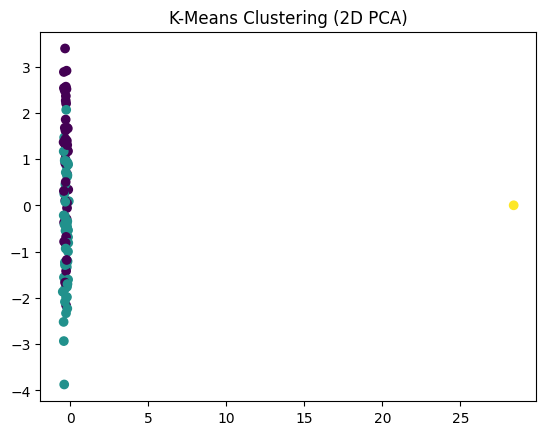

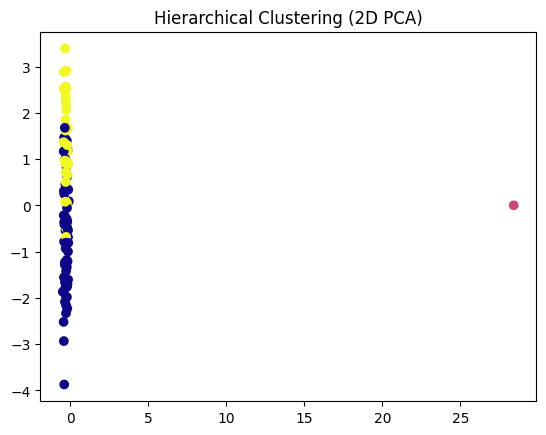

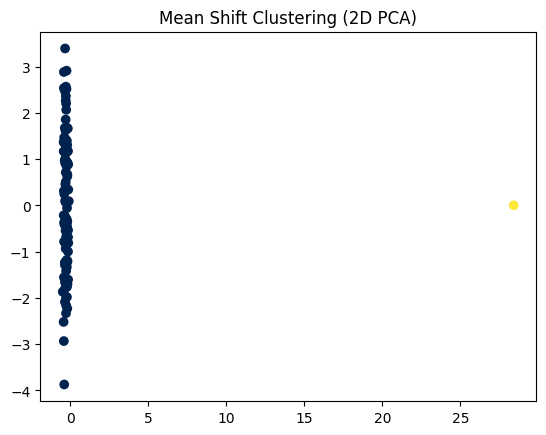

In [23]:
# K-Means Clusters Visualization
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering (2D PCA)')
plt.show()

# Hierarchical Clustering Visualization
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hierarchical_labels, cmap='plasma')
plt.title('Hierarchical Clustering (2D PCA)')
plt.show()

# Mean Shift Clustering Visualization
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=mean_shift_labels, cmap='cividis')
plt.title('Mean Shift Clustering (2D PCA)')
plt.show()
